## NumPy ndarray 快速入门 下

- 广播机制
- 转置等函数
- ufunc 函数
- NumPy 中 einsum
- NumPy 之 C 语言扩展

In [2]:
import numpy as np

## 广播

NumPy 运算通常是在两个数组的元素级别上进行的。最简单情况就是，两个具有完全相同 shape 的数组运算，如下面例子所示，

In [3]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

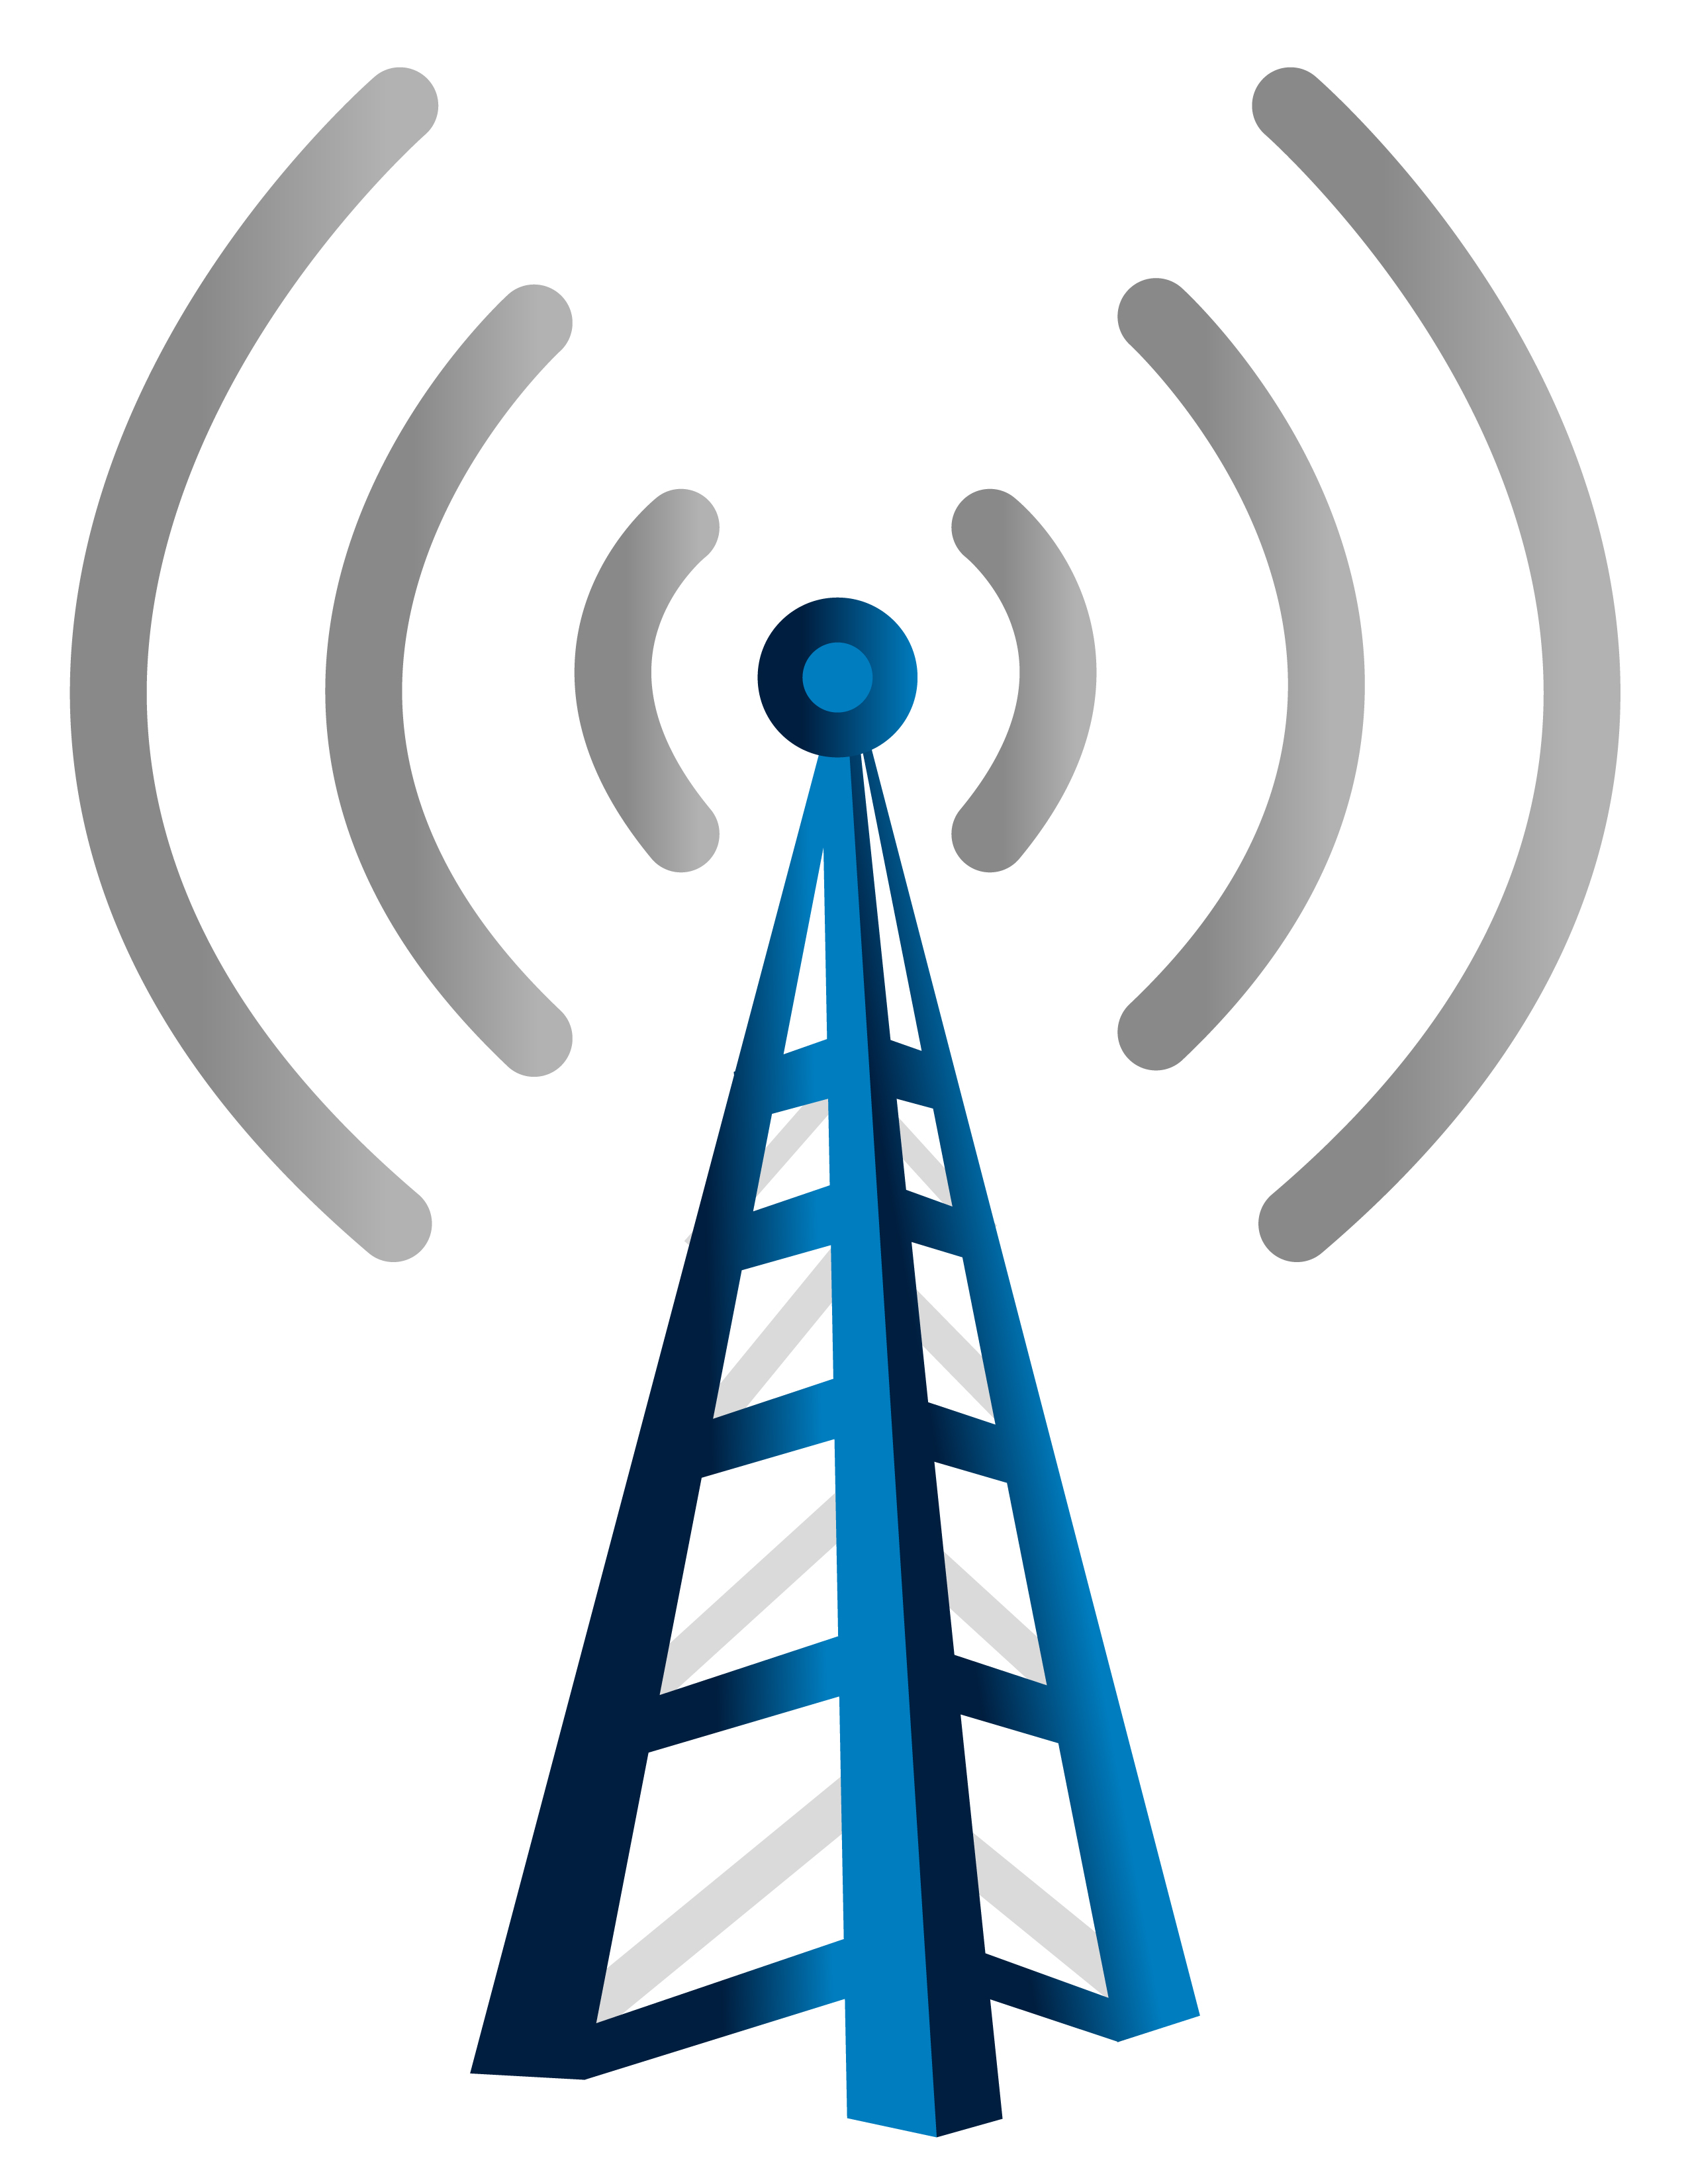

numpy 的广播机制是指在执行算术运算时处理不同 shape 的数组的方式。在一定规则下，较小的数组在较大的数组上**广播**，从而使得数组具有兼容的 shape。

In [4]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

#### 广播规则

在两个数组上执行运算时，NumPy 比较它们的形状。它从 shape 的最右边开始往左一一比较。如果所有位子比较下来都是下面两种情况之一，

- 相同位子上的两个数字相等
- 或者其中之一是 1

那么这两个数组可以运算。如果不满足这些条件，则将引发 ValueError，表明数组的 shape 不兼容。

In [ ]:
在下面这些示例中，A 和 B 数组中长度为 1 的那些轴（缺失的轴自动补 1），在广播期间会扩展为另一个数组相同位子上更大的长度，

In [ ]:
A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
    
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

下面例子中第一个数组的 shape 为 (3,3)，第二个数组的 shape 为 (3,)，此时相当于 (1,3)，因此先将第二个数组的 shape 改为 (3,3)，相当于原来数组沿着 0 轴再复制 2 份。

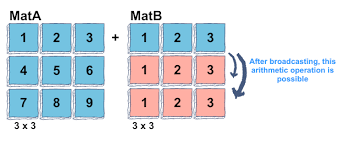

In [4]:
MatA = np.array([[1, 2, 3],[4,5,6],[7,8,9]])
MatB = np.array([1, 2, 3])
MatA + MatB

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12]])

为了一次理解这个机制，下面再给出几个例子。

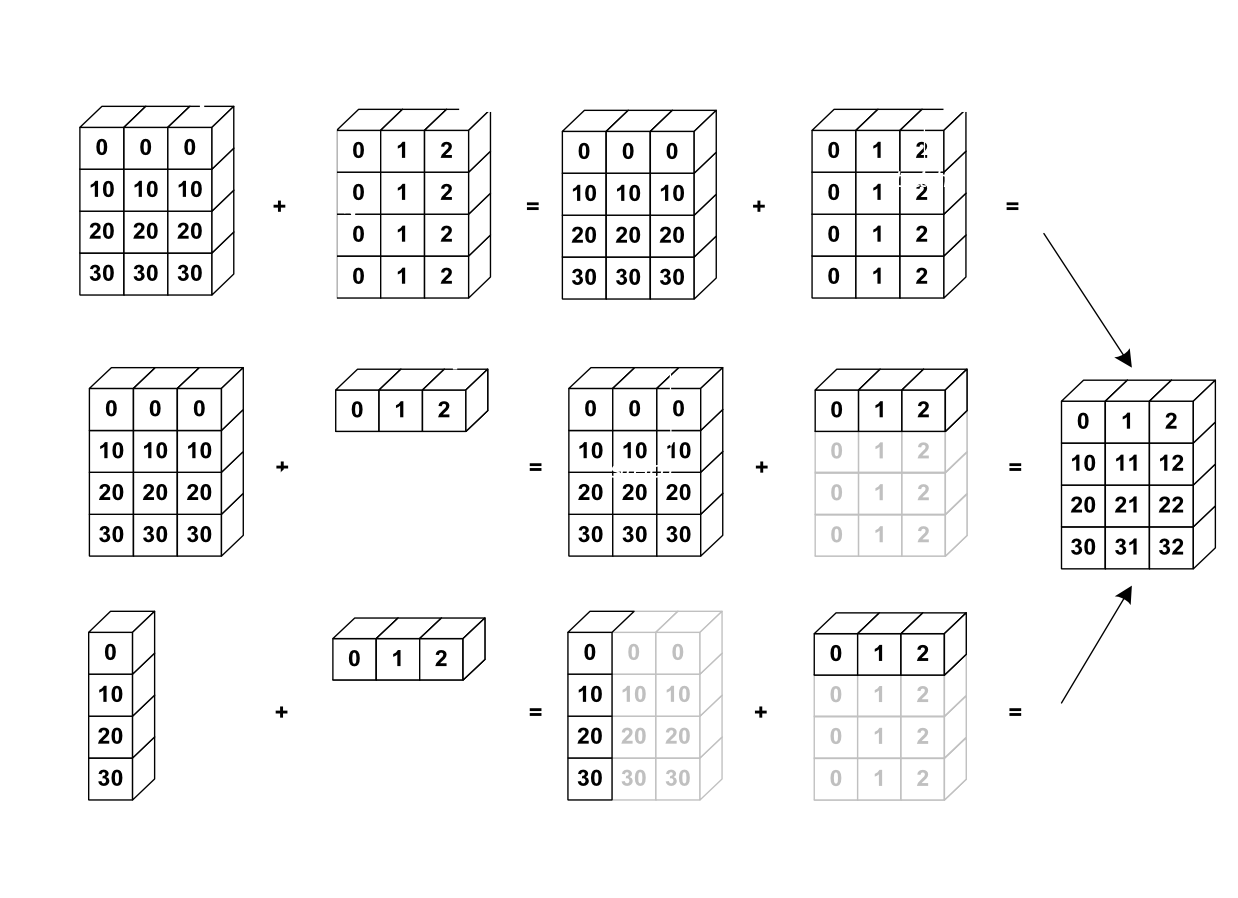

In [13]:
a = np.array([0,10,20,30])
b = np.array([0,1,2])

In [14]:
A = np.stack((a,a,a), axis=1)
A

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [12]:
B = np.stack((b,b,b,b))
B

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [15]:
A + B

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [16]:
A + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [17]:
a1 = np.array([[0,10,20,30]]).T
a1

array([[ 0],
       [10],
       [20],
       [30]])

In [18]:
a1 + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

而下面例子不满足广播规则，因而不能执行运算。

In [ ]:
A      (1d array):  3
B      (1d array):  4 # 倒数最后的轴长度不兼容

A      (2d array):  4 x 3
B      (1d array):      4 # 倒数最后的轴长度不兼容
    
A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # 倒数第二个轴长度不兼容

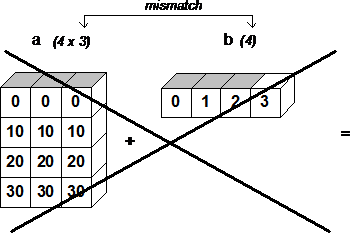

#### 广播小结

- 广播提供一种数组运算的便捷方式，使用 NumPy 数组时在实践中非常有用。
- 话虽如此，它并非在所有情况下都有效，并且实际上强加了执行广播必须满足的严格规则。
- 仅当数组中每个维的形状相等或维的大小为 1 时，才能执行算术运算。

## 维度增减

#### 维度增加

In [36]:
x = np.arange(6).reshape(2,3)
x, x.shape

(array([[0, 1, 2],
        [3, 4, 5]]), (2, 3))

In [35]:
x1 = x[:,np.newaxis,:]
x1, x1.shape

(array([[[0, 1, 2]],
 
        [[3, 4, 5]]]), (2, 1, 3))

In [34]:
# 或者
x2 = x[:,None,:]
x2, x2.shape

(array([[[0, 1, 2]],
 
        [[3, 4, 5]]]), (2, 1, 3))

#### 维度删减

#### numpy.squeeze() 

- 从数组中删除单维度的轴，即把 shape 中为 1 的维度去掉

In [24]:
x = np.arange(6).reshape(2,1,3)
x

array([[[0, 1, 2]],

       [[3, 4, 5]]])

In [25]:
y = x.squeeze()
y

array([[0, 1, 2],
       [3, 4, 5]])

In [26]:
y[0] = 10
y

array([[10, 10, 10],
       [ 3,  4,  5]])

In [27]:
x

array([[[10, 10, 10]],

       [[ 3,  4,  5]]])

In [28]:
# 查看数据在内存中的地址，验证是否指向同一块内存
xd = x.__array_interface__['data'][0] 
yd = y.__array_interface__['data'][0] 

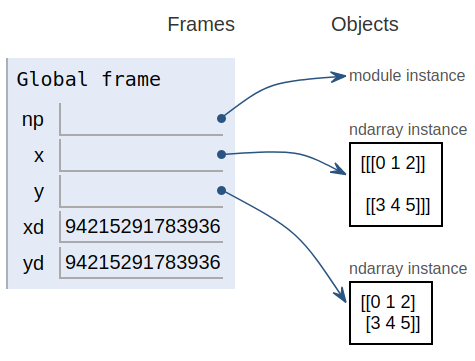

## 数组转置（换轴）

In [37]:
x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [38]:
y = np.transpose(x) # 或者 y = x.transpose() 或者 x.T
y

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [39]:
y = np.transpose(x, [1, 0])
y

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [40]:
转x = np.array([3,2,1,0,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(2, 2, 4)
x

array([[[ 3,  2,  1,  0],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [41]:
y1 = np.transpose(x, [1, 0, 2])
y1

array([[[ 3,  2,  1,  0],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

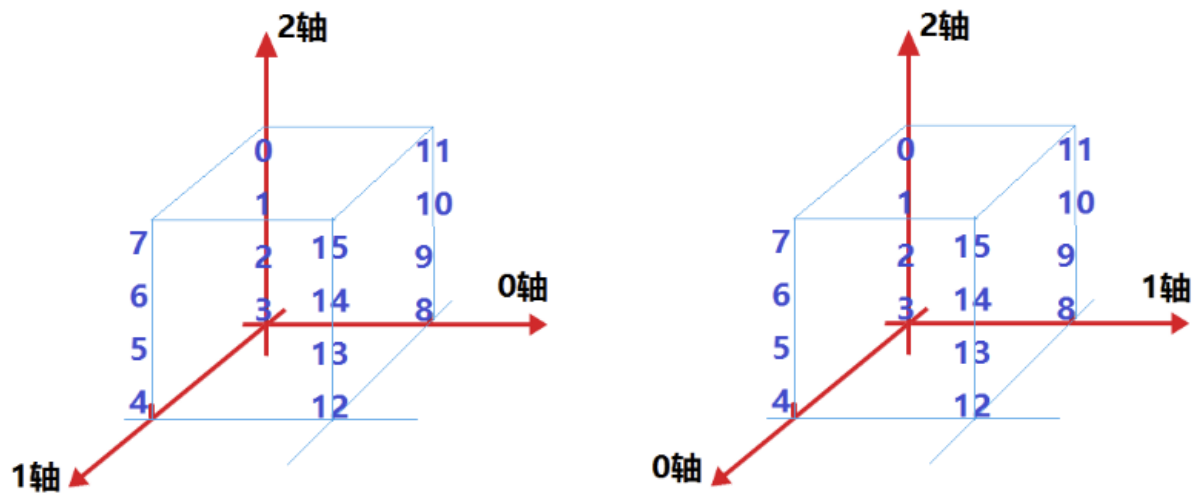

In [43]:
y2 = np.transpose(x, [2, 0, 1])
y2

array([[[ 3,  4],
        [ 8, 12]],

       [[ 2,  5],
        [ 9, 13]],

       [[ 1,  6],
        [10, 14]],

       [[ 0,  7],
        [11, 15]]])

In [ ]:
# 代码放一起
x = np.array([3,2,1,0,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(2, 2, 4)
y0 = np.transpose(x, [1, 2, 0])
y1 = np.transpose(x, [1, 0, 2])
y2 = np.transpose(x, [2, 0, 1])

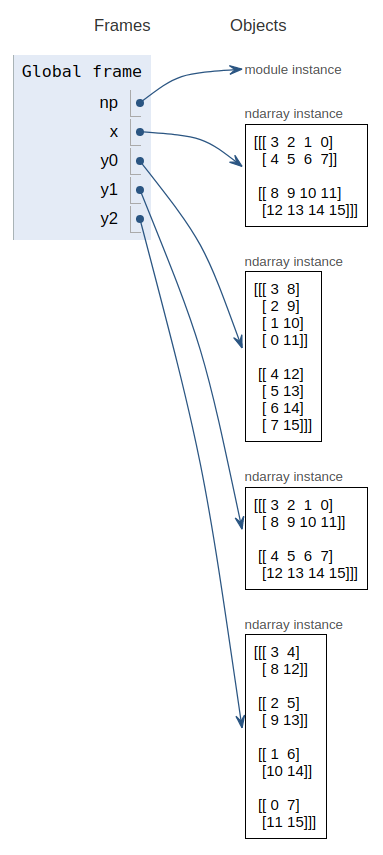

In [44]:
# 数据还是那些数据，更改的是各个轴上的步长stride
x.strides, y1.strides, y2.strides

((64, 32, 8), (32, 64, 8), (8, 64, 32))

In [45]:
# 数据还是同一份
id(x.data), id(y1.data), id(y2.data)

(139632239014680, 139632239014680, 139632239014680)

再看一个例子，三维数组三个轴，注意换轴后每个轴的步长。

In [47]:
x = np.arange(16).reshape(2, 2, 4)
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

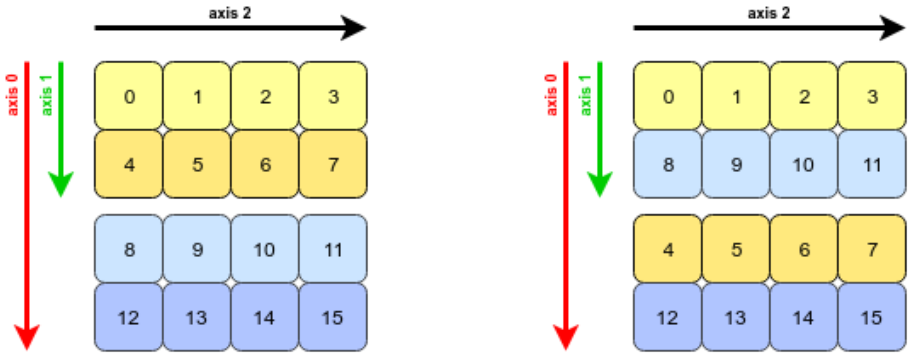

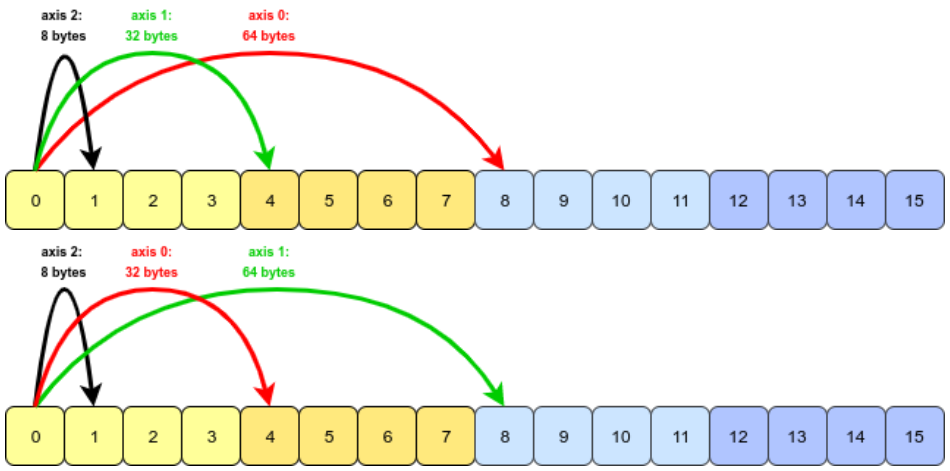

In [48]:
y = x.transpose((1, 0, 2))
y

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

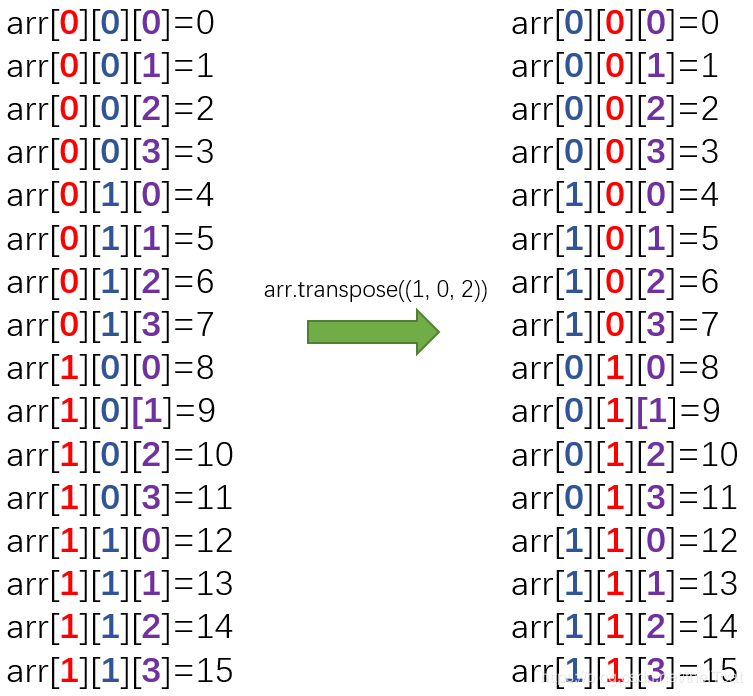

### 实际例子

RGB 图像数据

- 每张图像由红绿蓝三个通道组成，每个通道对应一个32×32的二维数组
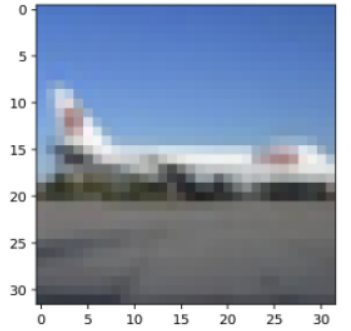

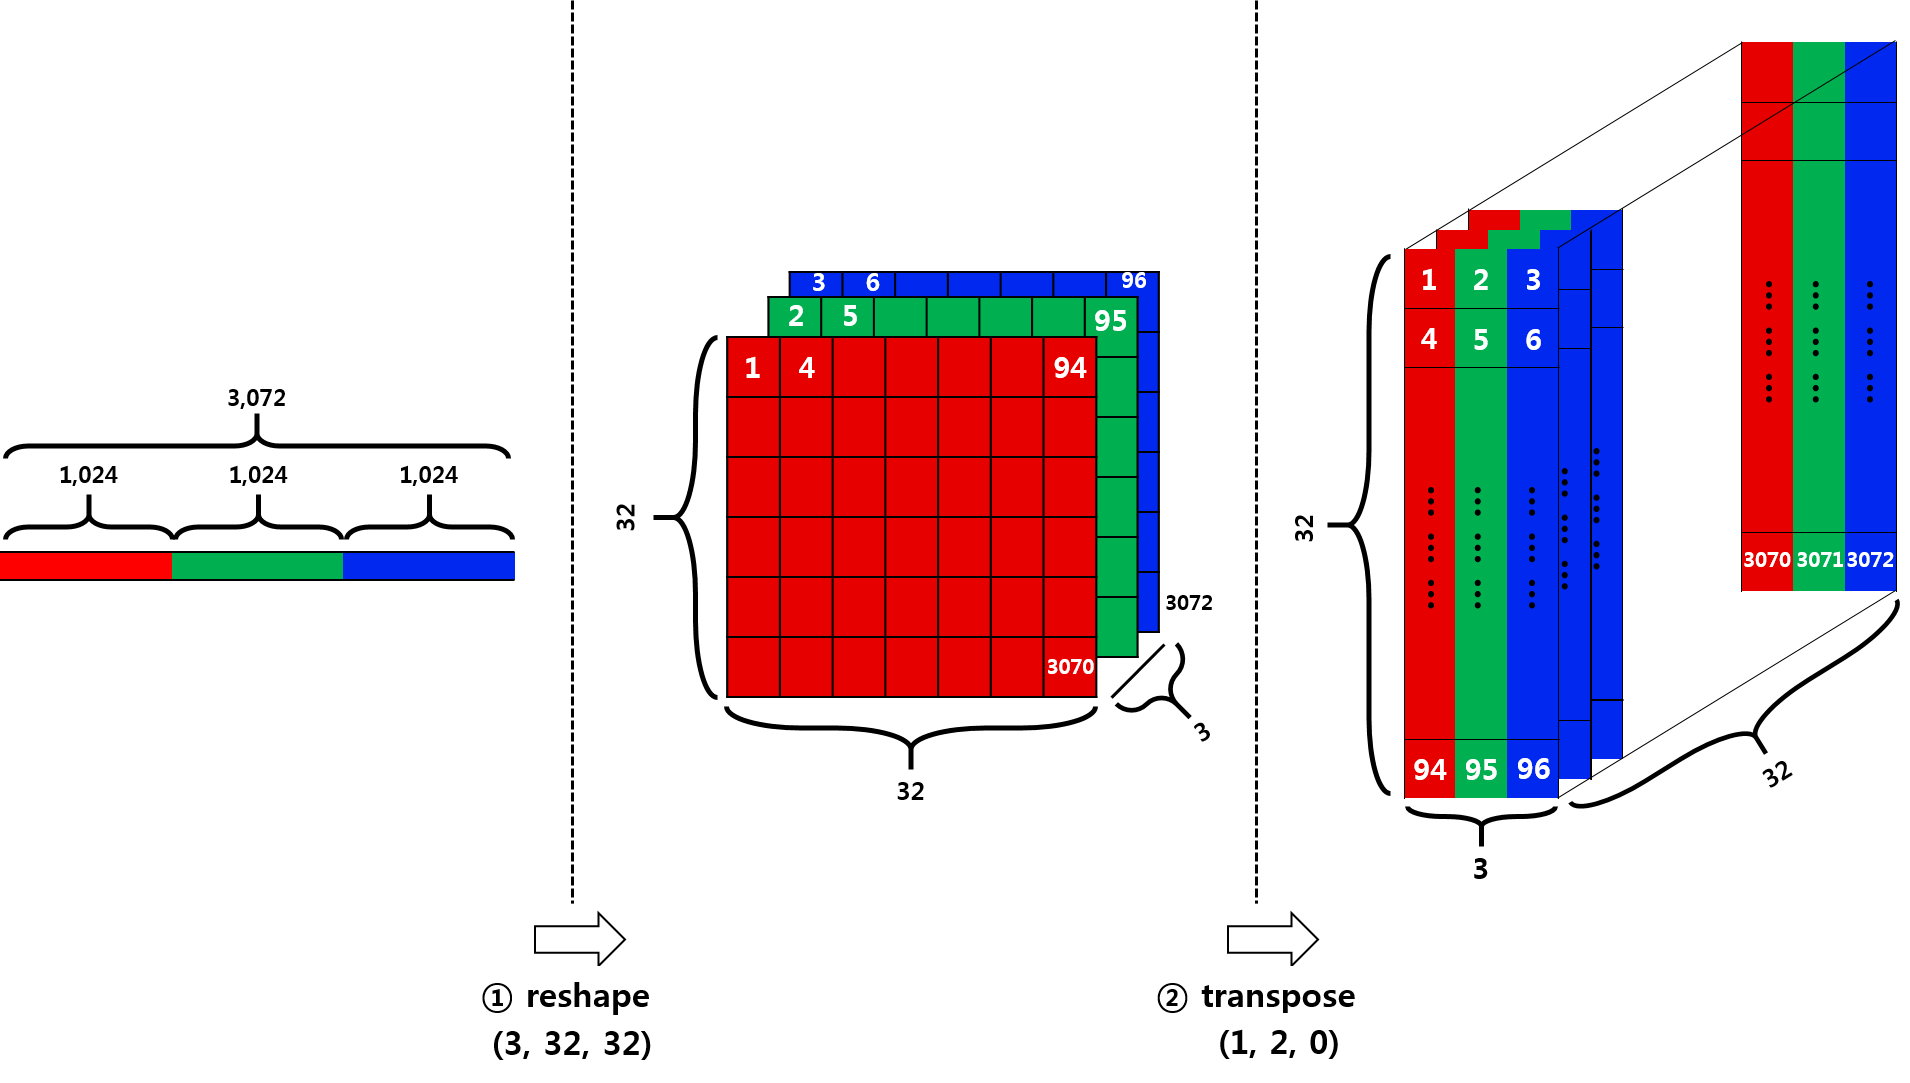

### 不换轴，只换某个轴上元素的次序

In [49]:
# 变换某个轴上元素的次序
z = x[..., (3, 2, 1, 0)]
z

array([[[ 3,  2,  1,  0],
        [ 7,  6,  5,  4]],

       [[11, 10,  9,  8],
        [15, 14, 13, 12]]])

In [50]:
x

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

## 通用函数

#### ufunc 函数

- ufunc 是 universal function 的缩写，是指能对数组的每个元素进行操作的函数，而不是针对 narray 对象操作。
- NumPy 提供了大量的 ufunc 函数。这些函数在对 narray 进行运算的速度比使用循环或者列表推导式要快得多。
- NumPy 内置的许多 ufunc 函数是 C 语言实现的，因此计算效率很高。

In [51]:
x = np.linspace(0, 2*np.pi, 5)
x

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

In [52]:
y, z = np.sin(x), np.cos(x)
y, z

(array([ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00,
        -2.4492936e-16]),
 array([ 1.0000000e+00,  6.1232340e-17, -1.0000000e+00, -1.8369702e-16,
         1.0000000e+00]))

In [54]:
# 将结果直接传给输入 x
np.sin(x, x)
x

array([ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00,
       -2.4492936e-16])

#### 效率比较

In [55]:
import time
import math
import numpy as np

In [56]:
x = [i for i in range(1000000)]

# math.sin
start = time.process_time()
for i, t in enumerate(x):
    x[i] = math.sin(t)
math_time = time.process_time()-start    

# numpy.sin
x = np.array(x, dtype=np.float64)
start = time.process_time()
np.sin(x, x)
numpy_time = time.process_time()-start

# comparison
math_time, numpy_time, math_time/numpy_time

(0.22381269999999986, 0.010632936000000148, 21.04900283421218)

##### reduce 操作
- 沿着轴对数组进行操作，相当于将运算符 `<op>` 插入到沿轴的所有子数组或者元素当中。
- 格式为：`<op>.reduce (array=, axis=0, dtype=None)`

In [59]:
np.add.reduce([1,2,3])

6

In [60]:
np.add.reduce([[1,2,3],[4,5,6]], axis=1)

array([ 6, 15])

In [61]:
np.multiply.reduce([[1,2,3],[4,5,6]], axis=1)

array([  6, 120])

##### accumulate 操作
- 与 reduce 类似，只是它返回的数组和输入的数组的 shape 相同，保存所有的中间计算结果

In [62]:
np.add.accumulate([1,2,3])

array([1, 3, 6])

In [63]:
np.add.accumulate([[1,2,3],[4,5,6]], axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]])

#### 自定义 ufunc 函数

In [69]:
# 定义一个 python 函数
def ufunc_diy(x):
    c, c0, hc = 0.618, 0.518, 1.0
    x = x - int(x) 
    if x >= c: 
        r = 0.0
    elif x < c0: 
        r = x / c0 * hc
    else: 
        r = (c-x) / (c-c0) * hc
    return r

In [66]:
x = np.linspace(0, 2, 1000000)

In [ ]:
ufunc_diy(x)

In [70]:
start = time.process_time()
y1 = np.array([ufunc_diy(t) for t in x])
time_1 = time.process_time()-start
time_1

0.6131462560000003

#### frompyfunc 函数

- 将一个计算单个元素的函数转换成 ufunc 函数

In [71]:
ufunc = np.frompyfunc(ufunc_diy, 1, 1)

In [74]:
start = time.process_time()
y2 = ufunc(x)
time_2 = time.process_time()-start
time_2

0.25990152199999983

In [75]:
y2

array([0.0, 3.861007722011582e-06, 7.722015444023164e-06, ..., 0.0, 0.0,
       0.0], dtype=object)

### NumPy 之 C 扩展

- ctypes
- Cython

#### 1、ctypes
- ctypes 是 Python 的一个外部库，提供和 C 语言兼容的数据类型，可以很方便地调用 dll/so 中输出的 C 接口函数。

In [ ]:
#ufunc.c
'''
void ufunc_diy(double *x, double *y, int size) {

    double xx,r,c=0.618,c0=0.518,hc=1.0;
    for(int i=0;i<size;i++) {
        xx = x[i]-(int)(x[i]);
        if (xx>=c) r=0.0;
        else if (xx<c0) r=xx/c0*hc;
        else r=(c-xx)/(c-c0)*hc;
        y[i]=r;
    }
}
'''

In [ ]:
#ufunc.py
""" Example of wrapping a C library function that accepts a C double array as
    input using the numpy.ctypeslib. """

import numpy as np
import numpy.ctypeslib as npct
from ctypes import c_int

array_1d_double = npct.ndpointer(dtype=np.double, ndim=1, flags='CONTIGUOUS')

# load the library, using numpy mechanisms
lib = npct.load_library("lib_ufunc", ".")

# setup the return types and argument types
lib.ufunc_diy.restype = None
lib.ufunc_diy.argtypes = [array_1d_double, array_1d_double, c_int]

def ufunc_diy_func(in_array, out_array):
    return lib.ufunc_diy(in_array, out_array, len(in_array))

In [75]:
# 编译
# gcc -shared -fPIC -O2 ufunc.c -ldl -o lib_ufunc.so

In [172]:
import time
import numpy as np
import ufunc

start = time.process_time() 
ufunc.ufunc_diy_func(x, x)
end = time.process_time()
print("ufunc_diy time: ", end-start)

ufunc_diy time:  0.005073641999999268


In [0]:
# python test_ufunc.py 
# ufunc_diy time:  0.003 - 0.008

#### 2、Cython
- Cython 是 Python 的一个超集，可以编译为 C，Cython 结合了 Python 的易用性和原生 C 代码的高效率。

In [0]:
# ufunc_diy.h
void ufunc_diy(double * in_array, double * out_array, int size);

In [0]:
# ufunc_diy.c
void ufunc_diy(double *x, double *y, int size) {

    double xx,r,c=0.618,c0=0.518,hc=1.0;
    for(int i=0;i<size;i++) {
        xx = x[i]-(int)(x[i]);
        if (xx>=c) r=0.0;
        else if (xx<c0) r=xx/c0*hc;
        else r=(c-xx)/(c-c0)*hc;
        y[i]=r;
    }
}

In [8]:
# Cython支持 NumPy
# 在代码中声明 a = np.array([0,10,20,30])
b = np.array([0,1,2])cimport numpy，使用函数。

In [0]:
#_ufunc_cython.pyx_
""" Example of wrapping a C function that takes C double arrays as input using
    the Numpy declarations from Cython """

# cimport the Cython declarations for numpy
cimport numpy as np

# if you want to use the Numpy-C-API from Cython
# (not strictly necessary for this example, but good practice)
np.import_array()

# cdefine the signature of our c function
cdef extern from "ufunc_diy.h":
    void ufunc_diy (double * in_array, double * out_array, int size)

# create the wrapper code, with numpy type annotations
def ufunc_diy_func(np.ndarray[double, ndim=1, mode="c"] in_array not Noa = np.array([0,10,20,30])
b = np.array([0,1,2])ne,
                   np.ndarray[double, ndim=1, mode="c"] out_array not None):
    ufunc_diy(<double*> np.PyArray_DATA(in_array),
              <double*> np.PyArray_DATA(out_array),
              in_array.shape[0])

In [0]:
# setup.py
from distutils.core import setup, Extension
import numpy
from Cython.Distutils import build_ext

setup(
    cmdclass={'build_ext': build_ext},
    ext_modules=[Extension("ufunc_cython",
                 sources=["_ufunc_cython.pyx", "ufunc_diy.c"],
                 include_dirs=[numpy.get_include()])],
)
# 或者
from distutils.core import setup
import numpy
from Cython.Build import cythonize
 
setup(
    ext_modules=cythonize("_ufunc_cython.pyx", annotate=True),
    include_dirs=[numpy.get_include()]
)

In [0]:
# 编译
python setup.py build_ext --inplace

- 可以看到多了两个文件，一个是 _ufunc_cython.c，一个是 ufunc_cython.so（如果是 windows，则是 .pyd）
- c 文件就是 cython 将 pyx 文件解析成一个 c 文件，它不依赖平台，而 so 或者 pyd 文件，则是将 c 文件进行编译后的动态链接库，依赖于平台。 

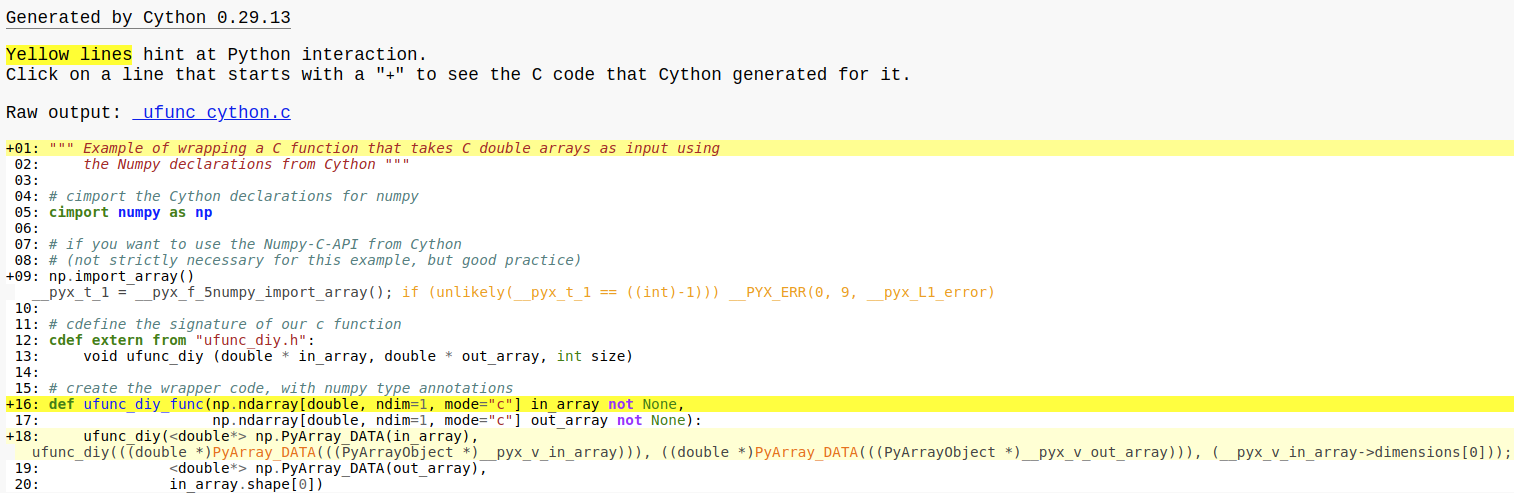

In [5]:
import time
import numpy as np
import ufunc_cython

start = time.process_time() 
ufunc_cython.ufunc_diy_func(x, x)
end = time.process_time()
print("ufunc_diy time: ", end-start)

ufunc_diy time:  0.004998610999999986


In [0]:
# python test_ufunc.py 
# ufunc_diy time:  0.002 - 0.006

### GPU 加速
- numba
- cupy
- pytorch